In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import winsound
import random

In [13]:
df= pd.read_csv("../../data/processed/oline_merge.csv")
df = df.drop('year',axis=1)
df = df.drop('playername',axis=1)
df = df.drop('team',axis=1)
df = df.drop('basesalarycap (10^8)',axis=1)
df = df.drop('cashspent (M)',axis=1)
df = df.drop('caphit (M)',axis=1)
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Unnamed: 0.1',axis=1)
df = df.drop('catchpercent',axis=1)
df = df.drop('draft_yr',axis=1)

In [7]:
df.columns

Index(['age', 'draft_pos', 'attempts', 'yards_run', 'tds_run', 'longgain_run',
       'yardsperatt', 'yardspergame_run', 'Percenthit (%)', 'g', 'gs', 'tgt',
       'rec', 'yards_rec', 'yardsperrec', 'tds_rec', 'firstdowns',
       'longgain_rec', 'yardspertarget', 'recpergame', 'yardspergame_rec',
       'fumbles', 'team_adjusted_line_yards', 'team_running_back_yards',
       'team_stuffed_rate'],
      dtype='object')

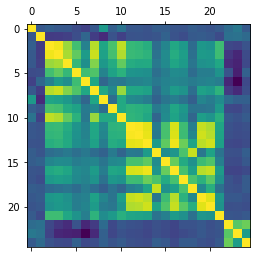

In [10]:
plt.matshow(df.corr())

In [14]:
df = df.drop('yardspergame_run',axis=1)
df = df.drop('yardsperatt',axis=1)
df = df.drop('yardspertarget',axis=1)
df = df.drop('yardsperrec',axis=1)
df = df.drop('recpergame',axis=1)
df = df.drop('yardspergame_rec',axis=1)


In [16]:
len(df.columns)

19

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [20]:
df

,age,draft_pos,attempts,yards_run,tds_run,longgain_run,Percenthit (%),g,gs,tgt,rec,yards_rec,tds_rec,firstdowns,longgain_rec,fumbles,team_adjusted_line_yards,team_running_back_yards,team_stuffed_rate
0,26,182,75,389,5,75,1.100909,9,9,45,33,261,2,12,30,2,5.0,3.0,1.0
1,25,182,236,1084,16,56,0.369547,16,16,68,49,474,3,18,67,3,5.0,13.0,6.0
2,24,182,133,728,8,67,0.293098,12,8,35,26,206,1,12,24,1,7.0,6.0,12.0
3,23,7,81,448,4,46,0.308675,12,4,18,9,22,0,2,9,0,5.0,13.0,2.0
4,35,7,80,314,2,27,0.529768,11,8,16,11,78,0,3,18,0,19.0,22.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,22,153,77,312,1,19,0.329198,13,3,13,6,55,0,1,18,1,13.0,13.0,12.0
584,32,23,138,377,2,16,0.398135,12,6,11,8,20,0,0,9,1,18.0,29.0,18.0
585,24,160,31,89,1,18,0.408291,8,0,12,9,65,0,4,16,0,26.0,15.0,26.0
586,23,160,76,293,1,16,0.405357,13,5,23,18,152,0,9,17,2,18.0,17.0,29.0


In [22]:
X = df.drop('Percenthit (%)',axis=1).values
y = df['Percenthit (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [29]:
len(X[1])

18

In [32]:
esv = []
# while True: 
for i in range(10):
    
    X_train.shape
    model = Sequential()

    model.add(Dense(18, activation="relu"))
    model.add(Dense(random.randint(5,6), activation="relu"))
    model.add(Dense(random.randint(5,6), activation="relu"))
    model.add(Dense(random.randint(5,6), activation="relu"))
    

    model.add(Dense(1))

    model.compile(optimizer="adam", loss="mse")
    model.fit(x=X_train, y= y_train, validation_data=(X_test,y_test),batch_size=32,epochs=65)
    
    predictions = model.predict(X_test)
    esv.append(explained_variance_score(y_test,predictions))
    print('\n'+'\n'+"ESV: " + str(explained_variance_score(y_test,predictions))+ '\n'+'\n'+'\n')
    if(explained_variance_score(y_test,predictions) > .625):
        winsound.Beep(1047, 750)
        winsound.Beep(1047, 750)
        break
#     winsound.Beep(1397,250)

esv.sort(reverse=True)
print("\n")
print("MAX: " + str(max(esv)))
print("\n")
print(esv)
winsound.Beep(784, 750)

Epoch 1/65
15/15 [==============================] - 0s 8ms/step - loss: 6.9478 - val_loss: 6.3394
Epoch 2/65
15/15 [==============================] - 0s 3ms/step - loss: 6.7599 - val_loss: 6.1404
Epoch 3/65
15/15 [==============================] - 0s 3ms/step - loss: 6.4990 - val_loss: 5.7205
Epoch 4/65
15/15 [==============================] - 0s 3ms/step - loss: 6.0082 - val_loss: 4.8476
Epoch 5/65
15/15 [==============================] - 0s 2ms/step - loss: 5.1723 - val_loss: 3.8522
Epoch 6/65
15/15 [==============================] - 0s 3ms/step - loss: 4.3150 - val_loss: 3.1284
Epoch 7/65
15/15 [==============================] - 0s 2ms/step - loss: 3.8947 - val_loss: 2.9070
Epoch 8/65
15/15 [==============================] - 0s 3ms/step - loss: 3.7565 - val_loss: 2.8336
Epoch 9/65
15/15 [==============================] - 0s 3ms/step - loss: 3.6750 - val_loss: 2.7120
Epoch 10/65
15/15 [==============================] - 0s 3ms/step - loss: 3.5910 - val_loss: 2.6146
Epoch 11/65
15/15 [

15/15 [==============================] - 0s 3ms/step - loss: 2.9201 - val_loss: 1.8039
Epoch 19/65
15/15 [==============================] - 0s 3ms/step - loss: 2.9320 - val_loss: 1.7658
Epoch 20/65
15/15 [==============================] - 0s 3ms/step - loss: 2.8313 - val_loss: 1.7211
Epoch 21/65
15/15 [==============================] - 0s 3ms/step - loss: 2.7859 - val_loss: 1.6862
Epoch 22/65
15/15 [==============================] - 0s 3ms/step - loss: 2.7572 - val_loss: 1.6592
Epoch 23/65
15/15 [==============================] - 0s 3ms/step - loss: 2.7367 - val_loss: 1.6349
Epoch 24/65
15/15 [==============================] - 0s 3ms/step - loss: 2.7009 - val_loss: 1.6057
Epoch 25/65
15/15 [==============================] - 0s 3ms/step - loss: 2.6714 - val_loss: 1.5949
Epoch 26/65
15/15 [==============================] - 0s 3ms/step - loss: 2.6459 - val_loss: 1.5720
Epoch 27/65
15/15 [==============================] - 0s 3ms/step - loss: 2.6380 - val_loss: 1.5574
Epoch 28/65
15/15 [===

In [33]:
#model.save('./savedmodels/April6-63dnn')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./savedmodels/April6-63dnn\assets


In [39]:
loaded_model = tf.keras.models.load_model('./savedmodels/April6-63dnn')
predictions = loaded_model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

MSE:  1.2363450292727132
RMSE:  1.1119105311457003
MAE:  0.7762509268859168
ESV:  0.6382079387175013


In [44]:
df.columns

Index(['age', 'draft_pos', 'attempts', 'yards_run', 'tds_run', 'longgain_run',
       'Percenthit (%)', 'g', 'gs', 'tgt', 'rec', 'yards_rec', 'tds_rec',
       'firstdowns', 'longgain_rec', 'fumbles', 'team_adjusted_line_yards',
       'team_running_back_yards', 'team_stuffed_rate'],
      dtype='object')

In [49]:
Aaron_Jones2020 = np.array([[26,182,201,1104,9,77,14,14,63,47,355,2,15,30,2,5,3,1]])
Aaron_Jones2020.shape
ScaledAaronJones = scaler.fit_transform(Aaron_Jones2020)

In [50]:
loaded_model.predict(ScaledAaronJones)

array([[1.2621676]], dtype=float32)

In [51]:
KenyanDrake_2020 = np.arrray([['age', 'draft_pos', 'attempts', 'yards_run', 'tds_run', 'longgain_run',
       , 'g', 'gs', 'tgt', 'rec', 'yards_rec', 'tds_rec',
       'firstdowns', 'longgain_rec', 'fumbles', 'team_adjusted_line_yards',
       'team_running_back_yards', 'team_stuffed_rate']])

NameError: name 'KenyanDrake' is not defined